## Implementation of multivariate Linear Regression with Mini-batch Gradient Descent using vectorization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv').values
X = train[:, :-1]
Y = train[:, -1:]
xt = pd.read_csv('test.csv').values

u = X.mean(axis = 0)
s = X.std(axis = 0)
X = (X-u)/s
xt = (xt-u)/s

In [3]:
X = np.hstack((np.ones((X.shape[0], 1)), X))
xt = np.hstack((np.ones((xt.shape[0], 1)), xt))

In [4]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def gradient(X, Y, theta):
    H = hypothesis(X, theta)
    grad = np.dot(X.T, (H - Y))
    return grad/X.shape[0]

def loss(X, Y, theta):
    H = hypothesis(X, theta)
    error = (H - Y)**2
    return error.mean()

def gradientDescent(X, Y, max_itr=10, lr=0.1, batch_size=64):
    (m, n) = X.shape
    error_list = []
    theta = np.zeros((n, 1))
    k = int(m / batch_size)
    
    for i in range(max_itr):
        for j in range(k+1):
            if j == k:
                if m%k > 0:
                    X1 = X[k*batch_size :, :]
                    Y1 = Y[k*batch_size :, :]
                else:
                    pass
            else:
                X1 = X[j*batch_size : (j+1)*batch_size, :]
                Y1 = Y[j*batch_size : (j+1)*batch_size, :]
                
            grad = gradient(X1, Y1, theta)
            theta = theta - lr*grad
            error_list.append(loss(X1, Y1, theta))
        
    return theta, error_list

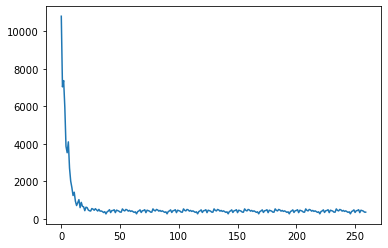

In [5]:
theta, error_list = gradientDescent(X, Y)
plt.plot(error_list)
plt.show()

In [6]:
yt = hypothesis(xt, theta)
df = pd.DataFrame(yt, columns = ['target'])
df.to_csv('pred.csv', index_label='Id')
# print(yt.shape)